# MULTILINGUAL STATISTICAL TERMINOLOGY DATASET
___
South Africa is a very diverse and multilingual country with 11 official languages, 2 of which are european languages namely Afrikaans and English, 9 African languages are divided into two groups namely **Nguni-Tsonga languages:**( isiNdebele, isiXhosa, isiZulu, siSwati, Xitsonga) and **Sotho-Makua-Venda languages**: (Sesotho, Sepedi, Setswana, Tshivenda). The link below describes South African languages and great analysis.  

more info [https://southafrica-info.com/arts-culture/11-languages-south-africa/](https://southafrica-info.com/arts-culture/11-languages-south-africa/)
___

### About Notebook  
The goal of this notebook is to structure and clean data from [MULTILINGUAL STATISTICAL TERMINOLOGY PDF](../data/pdf/Multilingual_Statistical_-terminology_2013.pdf) that was publish in 2013 with all 11 official languages spoken in South Africa. Since data comes in different format it will be great to structure the data first and do little bit of cleaning. **Text Analytics** is growing rapidly especially Natural language Understanding/Processing, The dataset from [this PDF](../data/pdf/Multilingual_Statistical_-terminology_2013.pdf) has been translated from English to other official languages, take it as if you were to translate some of terms from **English** to other languages like **isiNdebele, isiXhosa, isiZulu and others** 

___
### Load Packages 
Lets load packages that we need to achieve the goal above

In [1]:
import os
import re
import textract
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from io import StringIO
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from PyPDF2 import PdfFileWriter, PdfFileReader
%matplotlib inline
pd.options.display.max_colwidth = 100

### Load Data 
___
Lets load data from pdf

In [2]:
PATH_PDF = '../data/pdf/Multilingual_Statistical_-terminology_2013.pdf'
pdf_reader = PdfFileReader(open(PATH_PDF, 'rb'))

### Partial View of data 
___
Lets check how data looks and check if it has number of pages as expected

In [3]:
print("Number of pages : {pages}".format(pages=pdf_reader.numPages))
print("Display content for first page")
print("_____________________________________________")
page_object = pdf_reader.getPage(0) 
print(page_object.extractText())

Number of pages : 439
Display content for first page
_____________________________________________
    MULTILINGUAL
 STATISTICAL
  TERMINOLOGY
MULTILINGUAL 
STATISTICAL
 TERMINOLOGY
The South Africa I know, the home I understand



* The number of pages are correct
* The content on the firt page looks good 

### Let's See Other pages
___
Checking other pages will make us have a proper view if the data will look as expected  
##### <span style='color:red'>NOTE: Uncommenting and Running the code below will results with similar output below, see below image, this is also same to `textract` module</span>
<img src='../images/PyPDF-Textract.PNG'>  
## <span style='color:green'>What are we looking for?</span>  
We are looking for a data that will look similar as image below.   
<img src='../images/PDF-Doc.PNG'> 

In [4]:
############## UNCOMMENT AND RUN TO EXPERIMENT ABOVE ######################
# page_object = pdf_reader.getPage(9) 
# print(page_object.extractText())

### Whats Next?
___
We know how our data should look like, so now we have to put our mind on this task. After few hours playing with lots of libraries similar to PyPDF(2) or textract the results are still the same, it does't change how the data should look like and the problem is that most of these libraries are only designed to read PDF and they read them the same way, The good thing is that as data scientist one of skills is to hack this data out of PDF. 

#### How are we going to hack it?
##### Conversion to txt file
The one greatest thing that always make it easier is that all the data is recorded better in the form of **X.txt**, that makes it easier for us to hack this PDF to looks similar to what we are expecting. There are many online conversion applications from **PDF to txt**, But I recommend **ZAMZAR**, 
> **ZAMZAR** Convert PDF to TXT - online and free - this page also contains information on the PDF and TXT file extensions.   

I have attached the picture below on it looks to convert from PDF to TXT, NO REGISTRATION REQUIRED.  

<img src='../images/ZAMZAR.PNG'>

#### What Then?
___
After Downloading the text file from pdf conversion now there is a new directory called **txt** on the same level as **pdf** directory. 

#### <span style='color:green'>Good News </span>
After going through that process we have a match, the same way how we imagined how the data should look like. See below picture txt file opened in notepad as high level check.
<img src='../images/TEXTFILE.PNG'>

### Scripting Begins
___
###### <span style='color:red'>NOTE: Remember conversion it has its pitfalls, some characters may loose their meaning which will deal them once we structured the data</span>    
Now we will start with scripting and make sure the data is in the format we like, tabular all the languages as headers with each translation category.  
**Lets get to it** 

In [5]:
## Path to text file/directory
PATH_TXT = '../data/txt/Multilingual_Statistical_-terminology_2013.txt'

In [6]:
### Word cloud Custom function ####
def plot_wordcloud(df, column, name):
    """ This is custom word cloud that is ready to 
        be used with any picture you would like to use for word cloud
        
        Args:
            df: pandas dataframe 
            column: str -> target column
            name: str -> name of the picture without extension for .png preferebly
        Return:
            None
    """
    d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
    mask = np.array(Image.open(path.join(d, '../images/' + name + ".png")))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", max_words=10000, mask=mask,
                   stopwords=stopwords, contour_width=3, contour_color='white')
    wc.generate(' '.join(df[column]))
    plt.figure(figsize=(16, 12))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [7]:
### Function to Skip Chapters ###
def skipping_chapters_lines(line):
    """ This function is to check if we have these terms as 
        chapters not as part of english terms or descriptions
        
        Args:
            line: bytes string
        
        Returns:
            results: boolean (True or False)
    """
    results = False
    chapters_list = [b'Transport and Communication\r\n', b'32. Transport and Communication\r\n', 
     b'       Trade\r\n', b'31. Trade\r\n', b'Tourism and Migration\r\n', 
     b'30. Tourism and Migration\r\n', b'       Tourism\r\n', b'29. Tourism\r\n',
     b'System of Business Registers\r\n', b'28. System of Business Registers\r\n', 
     b'Statistical Processes / Methodology / Metadata\r\n',
     b'27. Statistical Processes / Methodology / Metadata\r\n', 
     b'Social conditions / Personal services\r\n',
     b'26. Social conditions / Personal services\r\n', b'Science and Technology\r\n'
     b'25. Science and Technology\r\n', b'Public Finance\r\n',
     b'Science and Technology\r\n', b'25. Science and Technology\r\n',
     b'24. Public Finance\r\n', b'Private Sector\r\n',b'23. Private Sector\r\n', 
     b'       Prices\r\n', b'22. Prices\r\n', b'       Poverty\r\n', b'21. Poverty\r\n',
     b'Population Census\r\n', b'20. Population Census\r\n', b'National, Provincial and Local Government\r\n',
     b'19. National, Provincial and Local Government\r\n', b'National Accounts\r\n', 
     b'18. National Accounts\r\n', b'Manufacturing\r\n', b'17. Manufacturing\r\n', 
     b'Law / Justice\r\n', b'16. Law / Justice\r\n', b'       Labour\r\n', b'15. Labour\r\n', 
     b'Industry and Trade\r\n', b'14. Industry and Trade\r\n', b'Income, pensions, spending and wealth\r\n'
     b'13. Income, Pensions, Spending and Wealth\r\n', b'Housing and Services\r\n',
     b'Income, pensions, spending and wealth\r\n', b'13. Income, Pensions, Spending and Wealth\r\n',
     b'12. Housing and Services\r\n', b'Household Income and Expenditure\r\n', 
     b'11. Household Income and Expenditure\r\n', b'Health and Vital Statistics\r\n',
     b'10. Health and Vital Statistics\r\n', b'Geography\r\n', b'9. Geography\r\n',
     b'General Demography\r\n', b'8. General Demography\r\n', b'General Demography\r\n',
     b'8. General Demography\r\n', b'Environment\r\n', b'7. Environment\r\n',
     b'       Energy\r\n', b'6. Energy\r\n', b'Education\r\n', b'5. Education\r\n',
     b'Demography\r\n', b'4. Demography\r\n', b'Construction\r\n', b'3. Construction\r\n',
     b'Business Enterprises\r\n', b'2. Business Enterprises\r\n', b'Agriculture\r\n', 
     b'1. Agriculture\r\n']
    
    if line in chapters_list:
        results = True
        
    return results

In [8]:
def process_text_file(PATH_TXT):
    """ This function read data from text file and preprocess every 
        line and assign relavant data to correct language 
        
        Args:
            PATH_TXT: str 
        
        Returns:
            data: list ready to be consumed as dataframe
    """
    data = []
    with open(PATH_TXT, 'rb') as text_file:
        line_number = 0
        chapter = ''
        language = {}
        previous_text = ''
        english_term = ''
        english_defination = ''
        for line in text_file:
            if line_number >= 220:
                if re.findall(r'Statistics South Africa\s{7,}\W+\s{7,}\s+', str(line.strip())):
                    chapter = str(line.strip(), 'utf-8').replace('Statistics South Africa',
                            '').replace('Concepts and Definitions', '')
                line_needed = re.findall(r'\s+(Afrikaans|IsiNdebele|IsiXhosa|IsiZulu|Sepedi|Sesotho|Setswana|Siswati|Tshivenda|Xitsonga)\s+', str(line.strip()))
                line_needed1 = re.findall(r'(Afrikaans|IsiNdebele|IsiXhosa|IsiZulu|Sepedi|Sesotho|Setswana|Siswati|Tshivenda|Xitsonga)\s+', str(line.strip()))
                all_languages = ['Afrikaans', 'IsiNdebele', 'IsiXhosa', 
                                     'IsiZulu', 'Sepedi', 'Sesotho', 'Setswana', 
                                     'Siswati', 'Tshivenda', 'Xitsonga']
                if line_needed:
                    languag = [languag for languag in all_languages if languag in str(line.strip(), 'utf-8')][0]
                    if languag:
                        text = str(line.strip(), 'utf-8')
                        english_term =(english_term + ' ' + text.split(languag)[0]).strip()
                        language['English_Term'] = english_term.strip()
                        language[languag] = ' '.join(text.split(languag)[1:]).strip()
                        language['Category'] = chapter
                        if text.split()[0] == 'Xitsonga':
                            data.append(language)
                            language = {}
                            string = re.split(r'\s{2,}', line.strip().decode('utf-8'))
                            english_term = (english_term + ' ' + string[0]).strip()
                            english_defination = (english_defination + ' ' + string[1]).strip()
                        else:
                            language[languag] = ' '.join(text.split(languag)[1:]).strip()

                elif line_needed1:
                    text = str(line.strip(), 'utf-8')
                    language[text.split()[0]] = ' '.join(text.split()[1:])
                    language['Category'] = chapter
                    if text.split()[0] == 'Xitsonga':
                        language['English_Term'] = english_term.strip()
                        language['English_Definition'] = english_defination.strip()
                        data.append(language)
                        language = {}
                        english_term = ''
                        english_defination = ''
                    else:
                        language['English_Term'] = english_term.strip()
                        language['English_Definition'] = english_defination.strip()
                        language[text.split()[0]] = ' '.join(text.split()[1:])
                else:
                    lines = re.findall(r'\s{7,}', str(line.strip(),'utf-8'))
                    header = re.findall(r'Statistics South Africa\s{7,}\W+\s{7,}\s+', str(line.strip()))
                    page_numbers = re.findall(r'\d\s{7,}[\W+]', str(line.strip()))
                    header_ = re.findall(r'Statistics South Africa\s{7,}\W+\s{7,}\s+', str(line.strip()))
                    string = str(line.strip(), 'utf-8')

                    if lines and not page_numbers and not header:
                        if re.findall(r'\x0cStatistics South Africa\s{7,}\s+', line.decode('utf-8')):
                            pass
                        else:
                            string = re.split(r'\s{2,}', line.strip().decode('utf-8'))
                            if ('vorige jaar en die ooreenstemmende kwartaal van die huidige jaar' in string[1]) or \
                            ('kwartaal van die vorige jaar en die huidige jaar' in string[1]):
                                language['Afrikaans'] = language['Afrikaans'] + ' ' + string[1]
                                english_term = (english_term + ' ' + string[0]).strip()
                            elif ('yabakhenkethi)' in string[1]):
                                language['IsiXhosa'] = language['IsiXhosa'] + ' ' + string[1]
                                english_term = (english_term + ' ' + string[0]).strip()
                            elif ('ngamaZwe' in string) or ('yebhondi' in string) or ('ngekota efanako' in string):
                                language['IsiNdebele'] = language['IsiNdebele'] + ' ' + string[1]
                                english_term = (english_term + ' ' + string[0]).strip()
                            else:
                                english_term = (english_term + ' ' + string[0]).strip()
                                english_defination = (english_defination + ' ' + string[1]).strip()
                    elif page_numbers:
                        if 'Multilingual Statistical Terminology' in string:
                            pass
                        else:
                            string = re.split(r'\s{2,}', line.strip().decode('utf-8'))
                            english_term = (english_term + ' ' + string[0]).strip()
                            english_defination = (english_defination +' ' + string[1]).strip()
                    elif not header_:
                        if ('Chapter' in str(line.strip(), 'utf-8')) or (b'\r\n' == line):
                            pass
                        elif skipping_chapters_lines(line):
                            pass
                        else:
                            length = len(line.decode('utf-8')) - len(line.decode('utf-8').lstrip())
                            if length>=40 and length <= 49:
                                extent_text = previous_text.strip()
                                if extent_text.split()[0] == 'Xitsonga':
                                    data[-1]['Xitsonga'] = data[-1]['Xitsonga'] + ' ' + line.decode('utf-8').lstrip()
                                else:
                                    languag = [languag for languag in all_languages if languag in extent_text][0]
                                    language[languag] = language[languag] + ' ' + line.decode('utf-8').lstrip()

                            else:
                                if length == 0:
                                    try:
                                        string = re.split(r'\s{2,}', line.strip().decode('utf-8'))
                                        english_defination = (english_defination + ' ' + string[1]).strip()
                                        english_term = (english_term + ' ' + string[0]).strip()
                                    except IndexError:
                                        string = re.split(r'\s{2,}', line.strip().decode('utf-8'))
                                        english_term = (english_term + ' ' + string[0]).strip()
                                else:
                                    string = line.strip().decode('utf-8')
                                    english_defination =(english_defination + ' ' + string).strip()


            line_number += 1
            previous_text = line.decode('latin1')
            if b' '.join(line.strip().split()) == b'405 Multilingual Statistical Terminology':
                break ### End of Chapters that have translation
    return data

##### The Function above may need code refactoring if any, at the current moment is good enough since it does the job and it runs within 300 milliseconds
___

# The moment we have been Waiting for 

In [9]:
data = process_text_file(PATH_TXT)

### Pandafying the Data
___
The perfect way to see the data at the moment is to view it as a **Pandas Dataframe**

In [10]:
df = pd.DataFrame(data)

### Let's check the shape
___
We better know our data well, we are starting with dimension

In [11]:
df.shape

(1161, 13)

We have 1161 Translated terms (rows) with 13 columns 

#### Lets check Columns

In [12]:
df.columns

Index(['Afrikaans', 'Category', 'English_Definition', 'English_Term',
       'IsiNdebele', 'IsiXhosa', 'IsiZulu', 'Sepedi', 'Sesotho', 'Setswana',
       'Siswati', 'Tshivenda', 'Xitsonga'],
      dtype='object')

We have all official languages in the dataframe, Note Since we have this terms translated from English, we have English term and English definition and other laguages they don't have them since they are target laguages

### What about NAN values
___
We are not Expecting any NAN values but lets confirm that since every language has their definition translated from English 

In [13]:
df[df.isnull().T.any().T]

,Afrikaans,Category,English_Definition,English_Term,IsiNdebele,IsiXhosa,IsiZulu,Sepedi,Sesotho,Setswana,Siswati,Tshivenda,Xitsonga


There are no NaN Values as expected we are getting very good progress. No difficulties yet

## Partial View of Data 
___
Lets see the how data looks like we have been checking all this tick boxes but we haven't even look at the data lets see how it looks

In [14]:
df.head()

,Afrikaans,Category,English_Definition,English_Term,IsiNdebele,IsiXhosa,IsiZulu,Sepedi,Sesotho,Setswana,Siswati,Tshivenda,Xitsonga
0,Landbou-insette,Agriculture,"Consumable expendable inputs in agricultural production for both crops and livestock, for exampl...",Agricultural inputs,Iinsetjenziswa zokulima,Amagalelo ezolimo,Izinsizamikhiqizo zezolimo,Dithušatšweletšo temong,Dintlafatsi tsa temothuo,Dithusa-tlhagiso tsa temothuo,Tisetjentiswa tetekulima,Thikhedzo dza zwa vhulimivhufuwi,Swinonisi
1,Jaargewasse,Agriculture,Crops that are planted and harvested during the same production season.,Annual crops,Isivuno somnyaka,Izilimo zonyaka,izitshalo zonyaka,Dibjalo tša ngwaga,Dijalo tsa selemo tsa hang ka selemo,Dijwalo tsa ngwaga,Sivuno semnyaka,Zwikaṋwa zwa ṅwaha,Swimilanguva
2,Oppervlakte geoes vir graan,Agriculture,"Area harvested for dry grain (whole grain, seed, beans or unshelled nuts) for commercial purpose...",Area harvested for grain,isikhekhe esivunelwe ukudla,Ummandla ovunwe isivuno esiziinkozo,Insimu okuvunwe kuyo okusanhlamvu,Palomoka ya tema ya puno ya leroro,Masimo a kotulo ya dijothollo,Kgaolokotutsweng tlhaka/thoro,Indzawo levunelwe lokusaluhlavu,Tsimu / vhupo khaṋelwathoro,Ndhawu ya ntshovelo wa rimbewundzhoho
3,Oppervlakte beplant vir graan,Agriculture,That part of the total area planted that is planted with the intention of harvesting it for grai...,Area planted for grain,isikhekhe esitjalelwe ukudla,Ummandla otyalwe ukutya okuziinkozo,Insimu etshalwe okusanhlamvu,Tema ye e lemetšwego leroro/tema ye e lemetšwego dijothoro,Masimo a temo ya dijothollo,Kgaolo e jwetsweng tlhaka/thoro; kgaolojwetsweng,Indzawo lehlanyelelwe lokusaluhlavu,Tsimu /vhupo ndimelwathoro / ngobelelwathoro,Ndhawu yo byala rimbewundzoho
4,Kontantgewas,Agriculture,Crop grown for sale rather than for consumption on the farm. Synonym is food crop.,Cash crop,Ukudla kokuthengisa,Isilimo esinengeniso,Izitshalo ezizothengiswa,Dibjalo tša go rekišwa,Dijalo tse rekiswang,Dijwalothekiso,Silimo sekutsengiswa,Tshizwalwa / tshimela ndimelwathengiso,Xirimiwanxaviso


### Encoding (This is Big Deal)
___
Encoding matters especially when dealing with text data/ text analytics, In Story telling is refered to as extracting signal from noise, it is art when coming to encoding, with few iterations you can get lof of things done without changing your code, by only substituting encoding in string you are way too close to what you are looking for. 

Here is a thin line by using these two encoding to archive what we have at the moment, that helped a lot by changing from **'latin1/latin-1' to 'utf8/utf-8'**
### Note 
#### <span style='color:red'>Picture 1 - I thought symbols have lost their encoding during conversion from PDF to text (by using latin1)</span>  
<img src='../images/Latin1.PNG'>  

### Note
#### <span style='color:green'>Picture 2 - This is after checking file and only found out that the file is not changed (by using utf8)</span>  
<img src='../images/UTF8.PNG'>  


___
## Quering Data
Now that we solved our problems for structuring our data and it looks exactly what we expected lets query it using pandas 

In [15]:
df[df.English_Term.str.contains('Transport')]

,Afrikaans,Category,English_Definition,English_Term,IsiNdebele,IsiXhosa,IsiZulu,Sepedi,Sesotho,Setswana,Siswati,Tshivenda,Xitsonga
1160,Vervoertoerusting,Transport and Communication,"Equipment for moving people and objects. Inclusions: Motor vehicles, trailers and semi-trailers,...",Transport equipment,Iinthuthi,"izixhobo , ezisetyenziselwa kwizithutho",Okusetshenziselwa ukuthutha,Didirišwa tša dinamelwa,Disebediswa tsa transporoto,Didiriswa tsa dipalangwa,Tintfo msembenti wetekutfutsa,Zwiendedzi,Switirhisiwa swa vutleketli


In [16]:
df[df.English_Term.str.contains('Agricultural inputs')]

,Afrikaans,Category,English_Definition,English_Term,IsiNdebele,IsiXhosa,IsiZulu,Sepedi,Sesotho,Setswana,Siswati,Tshivenda,Xitsonga
0,Landbou-insette,Agriculture,"Consumable expendable inputs in agricultural production for both crops and livestock, for exampl...",Agricultural inputs,Iinsetjenziswa zokulima,Amagalelo ezolimo,Izinsizamikhiqizo zezolimo,Dithušatšweletšo temong,Dintlafatsi tsa temothuo,Dithusa-tlhagiso tsa temothuo,Tisetjentiswa tetekulima,Thikhedzo dza zwa vhulimivhufuwi,Swinonisi


#### Quering other languages 

In [17]:
df[df.Sepedi.str.contains('Maemo a')]

,Afrikaans,Category,English_Definition,English_Term,IsiNdebele,IsiXhosa,IsiZulu,Sepedi,Sesotho,Setswana,Siswati,Tshivenda,Xitsonga
135,Huwelikstaat,General Demography,Personal status of each individual in relation to the marriage laws or customs of a country. Cus...,Marital status,Amathatho; umendo,Imo yomtshato/ yomendo,Isimo sokushada,Maemo a tša lenyalo,Maemo lenyalong,Kemonyalo,Simo sekushada,Tshiimo tsha vhudzekani/mbingano,Xiyimo xa vukati
372,Ekonomiese status,Labour,"Measure of the level of economic well-being of individuals, for which income and ownership of as...",Economic status,Ubujamo bomnotho,Ubume bezoqoqosho,Isimo/ izimo sezomnotho,Maemo a ikonomi,Maemo a moruo,Kemo ya ikonomi,Bunjalo betemnotfo,Tshiimoṱhalusaekonomi,Xiyimo xa ikhonomi
404,Arbeidsmarkstatus,Labour,"Classification as employed, unemployed or not economically active.",Labour market status,Ubujamo bemakethe yomsebenzi,Ubume boluhlu lwemarike yabasebenzi,Izimo zabangaqasheka,Maemo a mmaraka wa bašomi,Boemo ba mmaraka wa basebetsi,Kemo ya balekanelatiro/basiamelatiro,Bunjalo bemakethe yebantfu bekusebenta,Thitho (u dzulela u shanduka) tshiimo tsha tshigwada tsha vhalugelamushumo,Swiyimo swa timakete ta vatirhi
609,Bestuursposte,"National, Provincial and Local Government","For the purpose of this survey, managerial positions refer to section 57 managers, according to ...",Managerial positions,Isikhundla sokuphatha,Izikhundla zolawulo,Izikhundla zobumenenja/zokuphatha,Maemo a bolaodi,Maemo a botsamaisi,Maemo a botsamaisi,Tikhundla tekuphatsa,Vhuimovhulanguli,Swiyimo swa vufambisi
696,Relatiewe armoede,Poverty,The position of an individual or household compared with the average income in a given country.,Relative poverty,Ubuchaka obulingeneko,Indlala eqikelelwayo,Ubuphofu obubalulekayo/obuqhathanisekayo,Maemo a bodiidi ka papišo,Bofutsana bo amanngwang le naha,Papisolehuma,Lizinga lebuphuya ngekwesimo,Mbambedzavhushai,Vusweti hi yelaniso
758,Internasionale Finansiële Verslagdoeningstandaarde (IFVS),Public finance,"Accounting standards adopted by the International Accounting Standard Board, stating how particu...",International Financial Reporting Standards (IFRS),AmaZinga weenTjhabatjhaba wokuBika ngeeMali,imigangatho yokunika ingxelo yezemali yamazwe ngamazwe,Amazingengaa Okubika Ngezimali Ngokwamazwe Omhlaba (i-IFRS),Maemo a go bega tša Ditšhelete a Boditšhabatšhaba,Boemo ba Matjhaba ba Tlaleho / Pehelo ya Ditjhelete,Maemopegelotlotlo a Boditšhaba (MPTB),Emacophelo / Emazinga embikotimali emhlaba,Tshiimo tsha kuvhigele kwa masheleni tsha dzitshakatshaka / Tshiimo tsha kuvhigele kwa tshelede ...,Mimpimo ya Mavikelo ya Matiko ya Swatimali


#### Go on and Query the data if you encounter any problem, report it as issue.

### Export data to CSV
___
Lets export data to csv, people prefer dealing with csv than this hectic task that we went through

In [18]:
df.Category = df.Category.str.strip()
df.to_csv('../data/csv/Multilingual_Statistical_-terminology_2013.csv', index=False)

# Is data ready for translation?
___
## Yes, our data is ready for consumption
let me leave you with this word cloud to get you more started

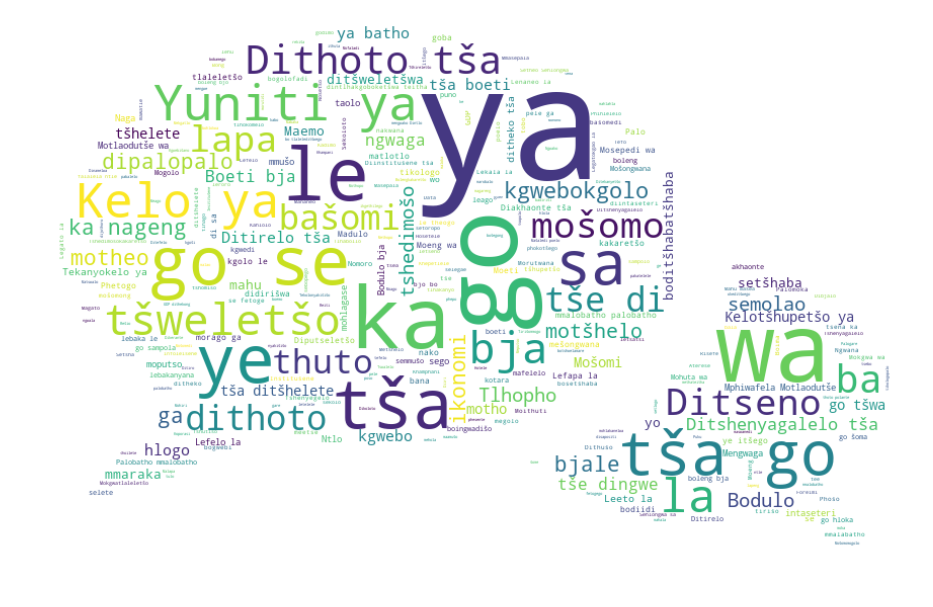

In [19]:
df.Sepedi = df.Sepedi.astype(str)
plot_wordcloud(df, 'Sepedi', 'Comment')

You can add stop words for your desired language most of words above are stop words in Sepedi so they need to be eliminated. another notebook coming soon

# Happy Coding Holidays 